# Shell Hackathon Submission

We concat the result file from 2019 and 2020. In addition we fix numerical isues by truncating the numerical values at 2 digits.

In [1]:
import pandas as pd

In [2]:
result_2019 = pd.read_csv("../data/processed/result_2019.csv")
result_2020 = pd.read_csv("../data/processed/result_2020.csv")

In [3]:
submission = pd.concat([result_2019, result_2020])

In [4]:
# We need to truncate the results. Otherwise the constraints are violated due to floating point issues
# see https://stackoverflow.com/a/49960574
def truncate(theNumber, theDigits):
    myDigits = 10 ** theDigits
    return (int(theNumber * myDigits) / myDigits)

In [5]:
submission['value'] = submission['value'].apply(lambda x: truncate(x,2))

The following check shows, that after truncating our numerical values, no spurious negative results are left.

In [6]:
submission[submission["value"] < 0.0]

,Unnamed: 0,year,data_type,demand_point_index,supply_point_index,value


Finally this is our complete result.

In [10]:
submission

,Unnamed: 0,year,data_type,demand_point_index,supply_point_index,value
0,0,2019,SCS,NaN,0,5.0
1,1,2019,SCS,NaN,1,4.0
2,2,2019,SCS,NaN,2,6.0
3,3,2019,SCS,NaN,3,5.0
4,4,2019,SCS,NaN,4,11.0
...,...,...,...,...,...,...
409795,409795,2020,DS,4095.0,95,0.0
409796,409796,2020,DS,4095.0,96,0.0
409797,409797,2020,DS,4095.0,97,0.0
409798,409798,2020,DS,4095.0,98,0.0


In [50]:
# commented out, so we don't overwrite the result
# submission.to_csv("../data/processed/submission.csv")

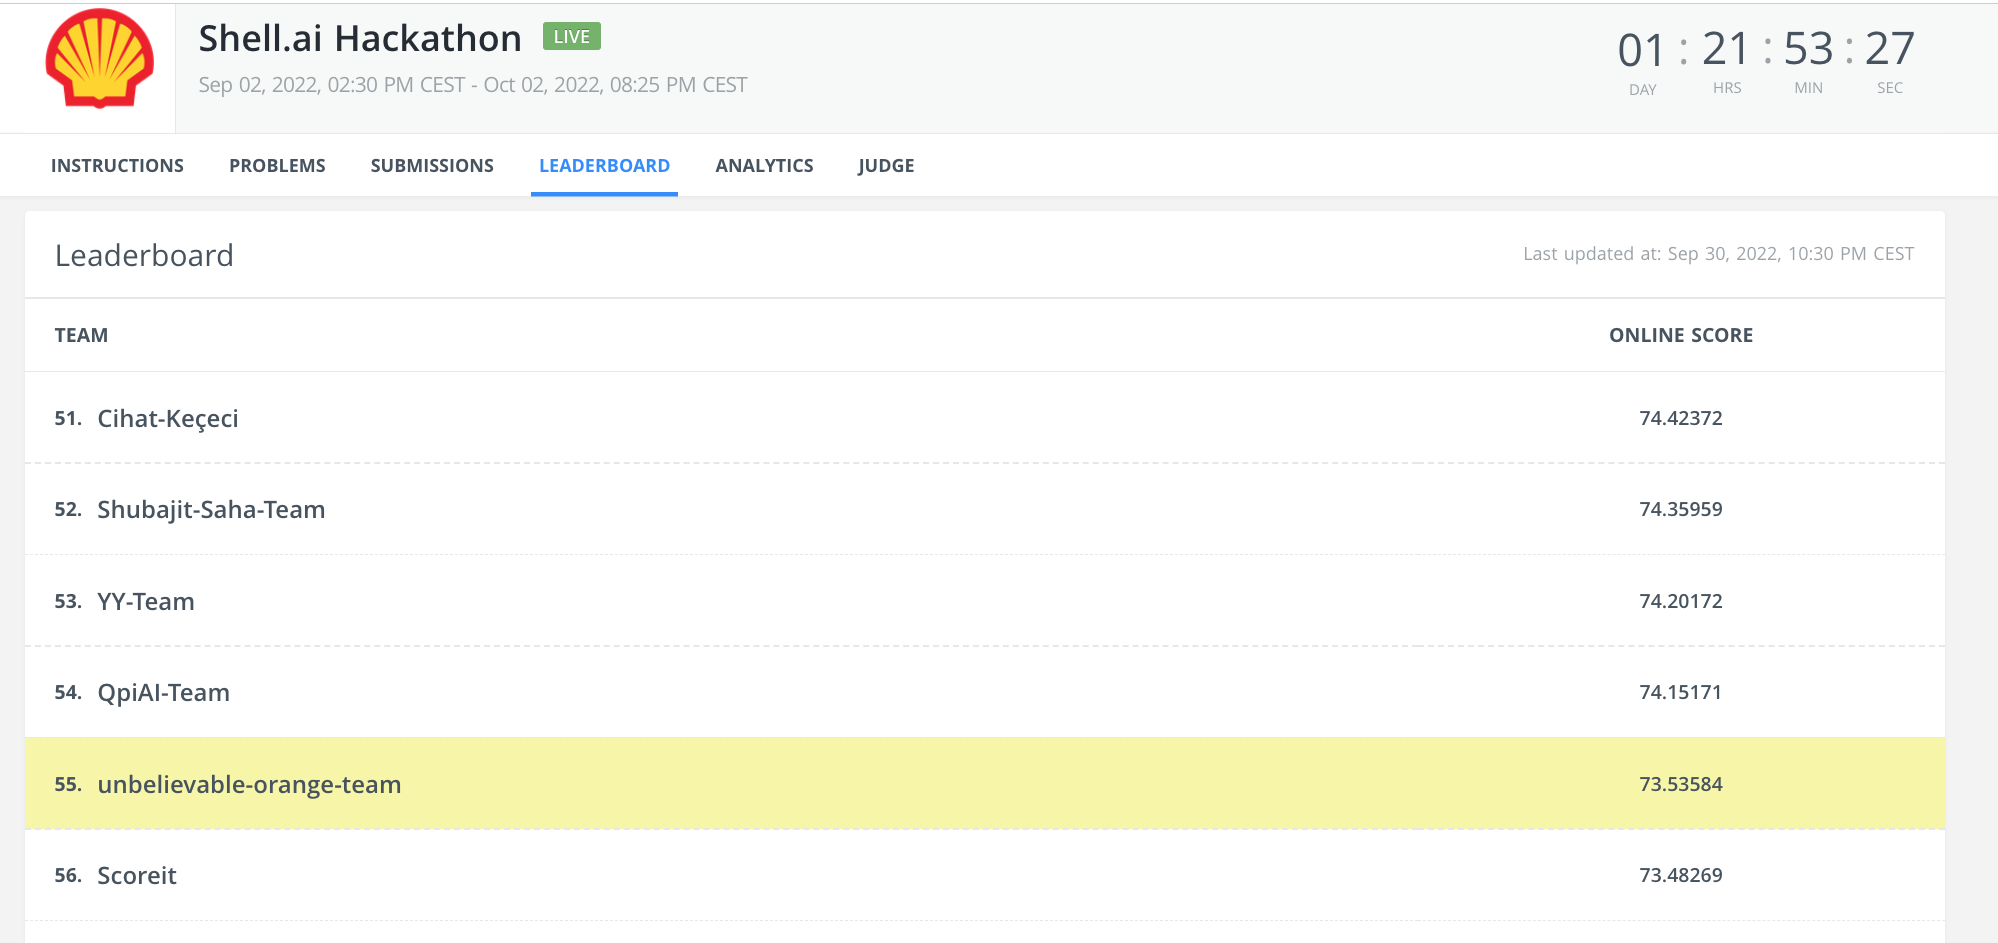

# The end